<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 04 - Data analyzing
</div>

### **Import necesary libraries**

In [2]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

import textwrap
# Cài đặt hàm auto-wrap text cho label, phục vụ việc vẽ và trực quan dữ liệu
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

### **Read from csv**

In [3]:
df = pd.read_csv("Data/processed_data.csv")
df.head(5)

,self_empl_flag,comp_no_empl,tech_comp_flag,mh_coverage_flag,mh_coverage_awareness_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,mh_discussion_neg_impact,...,mh_sought_proffes_treatm,mh_eff_treat_impact_on_work,mh_not_eff_treat_impact_on_work,age,sex,country_live,country_work,work_position,remote_flag,tech_flag
0,0,26-100,1.0,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,...,0,Not applicable to me,Not applicable to me,39,Male,United Kingdom,United Kingdom,Back-end Developer,Sometimes,1
1,0,6-25,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,...,1,Rarely,Sometimes,29,Male,United States of America,United States of America,Back-end Developer|Front-end Developer,Never,1
2,0,6-25,1.0,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,...,1,Not applicable to me,Not applicable to me,38,Male,United Kingdom,United Kingdom,Back-end Developer,Always,1
3,0,6-25,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,...,1,Sometimes,Sometimes,43,Female,United States of America,United States of America,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes,1
4,0,>1000,1.0,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,...,1,Not applicable to me,Often,42,Male,United Kingdom,United Kingdom,DevOps/SysAdmin|Support|Back-end Developer|Fro...,Sometimes,1


### **Analyzing**

#### Câu hỏi số 1: **Liệu các công ty có coi trọng sức khỏe tinh thần hay không?**
+ Bằng việc trả lời câu hỏi này, ta có thể hiểu rõ sức khỏe tổng thể của nhân viên và môi trường làm việc của công ty. Vì sức khỏe tinh thần ảnh hưởng trực tiếp đến sức khỏe của nhân viên, năng suất tại nơi làm việc, tiết kiệm chi phí tuyển dụng và sự gắn bó lâu dài trong tổ chức. Ưu tiên sức khỏe tâm thần góp phần tạo ra một môi trường làm việc tích cực và ngày càng được công nhận là một khía cạnh quan trọng của hoạt động kinh doanh có trách nhiệm và bền vững.

##### **Visualization**

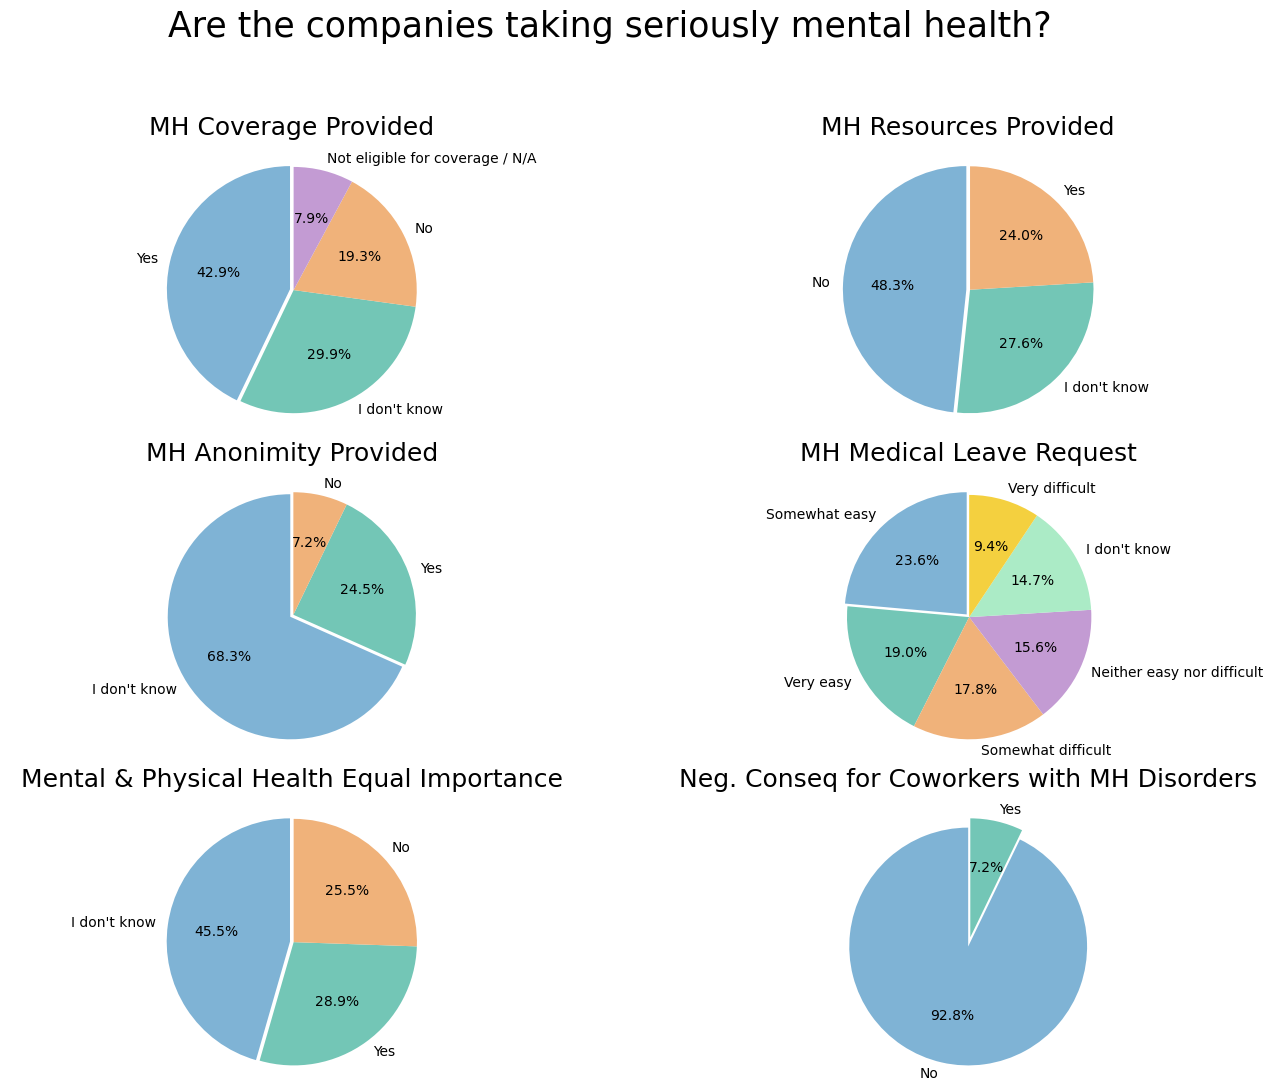

In [4]:
fig, ax = plt.subplots(figsize = (16, 12), ncols=2, nrows=3)
plt.suptitle('Are the companies taking seriously mental health?', fontsize = 25, y = 1)

# does your employer provide mental health benefits as part of healthcare coverage?
coverage_df = df[['mh_coverage_flag']]
coverage_df = coverage_df['mh_coverage_flag'].value_counts().reset_index()
colors = ['#7FB3D5', '#73C6B6', '#F0B27A', '#C39BD3']
explode = (0.03, 0, 0, 0)
ax[0][0].pie(coverage_df['mh_coverage_flag'], explode=explode, labels=coverage_df['index'], colors=colors, autopct='%1.1f%%', shadow=False, startangle=90)
ax[0][0].axis('equal')
ax[0][0].set_title('MH Coverage Provided', pad = 14, fontsize = 18)

# does your employer offer resources to learn more about mental health concerns and options for seeking help?
resource_df = df[['mh_resources_provided']]
resource_df = resource_df['mh_resources_provided'].value_counts().reset_index()
colors = ['#7FB3D5', '#73C6B6', '#F0B27A']
explode = (0.03, 0, 0) 
ax[0][1].pie(resource_df['mh_resources_provided'], explode=explode, labels=resource_df['index'], colors=colors, autopct='%1.1f%%', shadow=False, startangle=90)
ax[0][1].axis('equal')
ax[0][1].set_title('MH Resources Provided', pad = 14, fontsize = 18)

# is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
anonimity_df = df[['mh_anonimity_flag']]
anonimity_df = anonimity_df['mh_anonimity_flag'].value_counts().reset_index()
colors = ['#7FB3D5', '#73C6B6', '#F0B27A']
explode = (0.03, 0, 0) 
ax[1][0].pie(anonimity_df['mh_anonimity_flag'], explode=explode, labels=anonimity_df['index'], colors=colors, autopct='%1.1f%%', shadow=False, startangle=90)
ax[1][0].axis('equal')
ax[1][0].set_title('MH Anonimity Provided', pad = 14, fontsize = 18)

# if a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
medical_df = df[['mh_medical_leave']]
medical_df = medical_df['mh_medical_leave'].value_counts().reset_index()
all_ = df['mh_medical_leave'].count()
colors = ['#7FB3D5', '#73C6B6', '#F0B27A', '#C39BD3', '#ABEBC6', '#F4D03F']
explode = (0.03, 0, 0, 0, 0, 0)  
ax[1][1].pie(medical_df['mh_medical_leave'], explode=explode, labels=medical_df['index'], colors=colors, autopct='%1.1f%%', shadow=False, startangle=90)
ax[1][1].axis('equal')
ax[1][1].set_title('MH Medical Leave Request', pad = 14, fontsize = 18)

# do you feel that your employer takes mental health as seriously as physical health?
physical_df = df[['mh_eq_ph_employer']] 
physical_df = physical_df['mh_eq_ph_employer'].value_counts().reset_index()
colors = ['#7FB3D5', '#73C6B6', '#F0B27A']
explode = (0.03, 0, 0) 
ax[2][0].pie(physical_df['mh_eq_ph_employer'], explode=explode, labels=physical_df['index'], colors=colors, autopct='%1.1f%%', shadow=False, startangle=90)
ax[2][0].axis('equal')
ax[2][0].set_title('Mental & Physical Health Equal Importance', pad = 14, fontsize = 18)

# have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?
conseq_df = df[['mh_conseq_coworkers']]
conseq_df = conseq_df['mh_conseq_coworkers'].value_counts().reset_index()
colors = ['#7FB3D5', '#73C6B6']
explode = (0.08, 0) 
ax[2][1].pie(conseq_df['mh_conseq_coworkers'], explode=explode, labels=conseq_df['index'], colors=colors, autopct='%1.1f%%', shadow=False, startangle=90)
ax[2][1].axis('equal')
ax[2][1].set_title('Neg. Conseq for Coworkers with MH Disorders', pad = 14, fontsize = 18);

+ Từ những vấn đề liên quan đến những liệu pháp giúp cân bằng sức khỏe tinh thần mà người trả lời khảo sát được đề cập, ta sẽ tìm hiểu thêm về sự ảnh hưởng của quy mô công ty/ môi trường làm việc sẽ có sự cung cấp hỗ trợ về sức khỏe tinh thần như thế nào.

In [6]:
# company_type = small if comp_no_empl < 100
small = ['1-5', '6-25', '26-100']
isSmall = df['comp_no_empl'].str.contains('|'.join(small))
df['company_type'] = np.where(df['comp_no_empl'].str.contains('|'.join(small)), 'small', 'large')

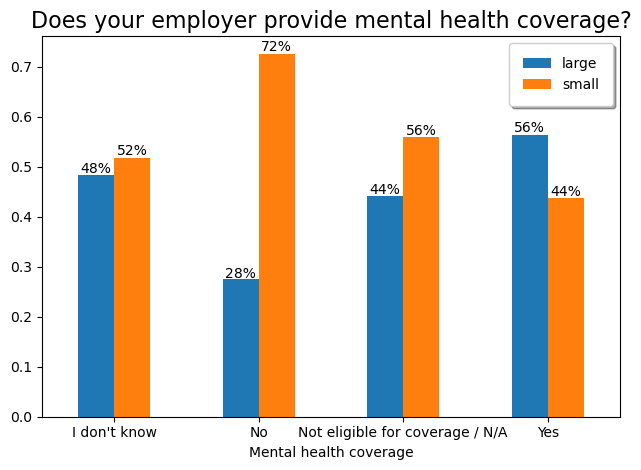

In [7]:
cbf = pd.crosstab(df['mh_coverage_flag'], df['company_type'])
bbf = pd.crosstab(df['mh_coverage_flag'], df['company_type'], normalize='index').plot.bar(rot=0)
plt.xlabel("Mental health coverage")
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.title("Does your employer provide mental health coverage?",fontsize=16)
for p in bbf.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    bbf.annotate(f'{height:.0%}', (x + width/2, y + height*1.01), ha='center')
plt.tight_layout()
plt.show()

In [8]:
print("Mental health coverage with respect to Company's size: ", chi2_contingency(cbf)[1])

Mental health coverage with respect to Company's size:  2.0544336517732835e-08


##### **Conclusion**

+ Gần một nửa số người trả lời khảo sát ($42.9\%$) đều được cung cấp `Mental Health Coverage`, tuy nhiên lại không có nguồn tài nguyên để tìm kiếm thêm thông tin về lĩnh vực này. Điều này có nghĩa rằng hầu hết các công ty đều đề cập đến sức khỏe tinh thần, nhưng không tích cực tham gia vào vấn đề đó. 
+ Hơn $70\%$ số người trả lời đều không biết rõ liệu quyền ẩn danh của họ có được bảo vệ trong trường hợp trao đổi với cấp trên về các vấn đề sức khỏe tinh thần hay không, trong khi đến gần một nửa trong số họ không chắc chắn rằng công ty sẽ cho họ nghỉ phép vì lý do liên quan đến sức khỏe tinh thần hay không.
+ Hầu hết những người được khảo sát đều không biết liệu công ty của họ có đang coi các vấn đề về sức khỏe tinh thân cũng nghiêm trọng như sức khỏe thể chất hay không. Điều đáng khích lệ là $92.8\%$ số người được hỏi không nghĩ rằng sẽ có những ảnh hưởng tiêu cực đối với những đồng nghiệp đã từng gặp vấn đề về sức khỏe tinh thần.
+ Cuối cùng, $56\%$ nhân viên được cung cấp `Mental Health Coverage` là từ những công ty có quy mô lớn. Hơn nữa, p-value thu được xấp xỉ $0$ do đó bác bỏ giả thuyết $H_0$ rằng các công ty lớn có khả năng cung cấp sự bảo vệ về sức khỏe tinh thần tương tự như các công ty nhỏ. Điều này nhắc nhở rằng cần cân nhắc về quy mô công ty cẩn thận trong quá trình làm việc.

#### Câu hỏi số 2: **Hiện nay sự quan tâm của mọi người về sức khỏe vật lý và sức khỏe tinh thần như thế nào ?**
+ Nguyên nhân: Biết được đáp án sẽ cho chúng ta cái nhìn  tổng quan nhất về tầm ảnh hưởng giữa sức khỏe tâm lý và sức khỏe vật lý đối với mọi người, từ đó có thể đưa ra các biện pháp, phương thức phù hợp nhất để có thể đáp ứng các nhu cầu của công việc có liên quan

##### **Preprocessing**

In [9]:
future_mh_df = df[['future_mh_specification']]
future_mh_df = future_mh_df['future_mh_specification'].value_counts().reset_index()

future_ph_df = df[['future_ph_specification']]
future_ph_df = future_ph_df['future_ph_specification'].value_counts().reset_index()

future_df = pd.merge(future_ph_df, future_mh_df, on='index', how='inner')
future_df

,index,future_ph_specification,future_mh_specification
0,Maybe,476,327
1,No,311,644
2,Yes,258,74


In [10]:
negative_df = df[['mh_discussion_neg_impact', 'ph_discussion_neg_impact']]
duplicates_df = negative_df[negative_df.duplicated(subset=['mh_discussion_neg_impact', 'ph_discussion_neg_impact'], keep='first')]
combined_count = duplicates_df.groupby(['mh_discussion_neg_impact', 'ph_discussion_neg_impact']).size().reset_index(name='count')
combined_count

,mh_discussion_neg_impact,ph_discussion_neg_impact,count
0,Maybe,Maybe,121
1,Maybe,No,242
2,Maybe,Yes,1
3,No,Maybe,5
4,No,No,326
5,Yes,Maybe,70
6,Yes,No,65
7,Yes,Yes,27


##### **Visualization**

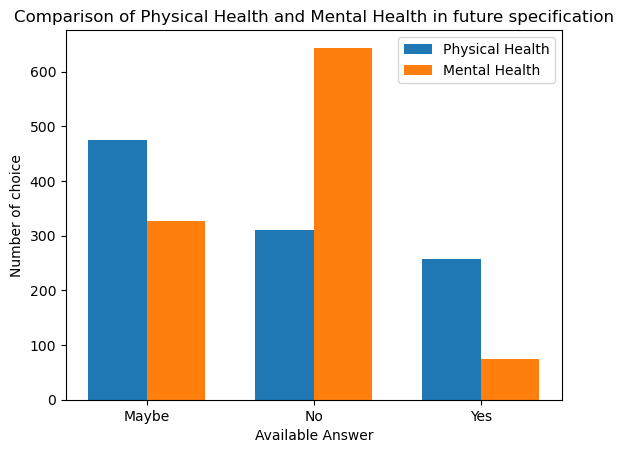

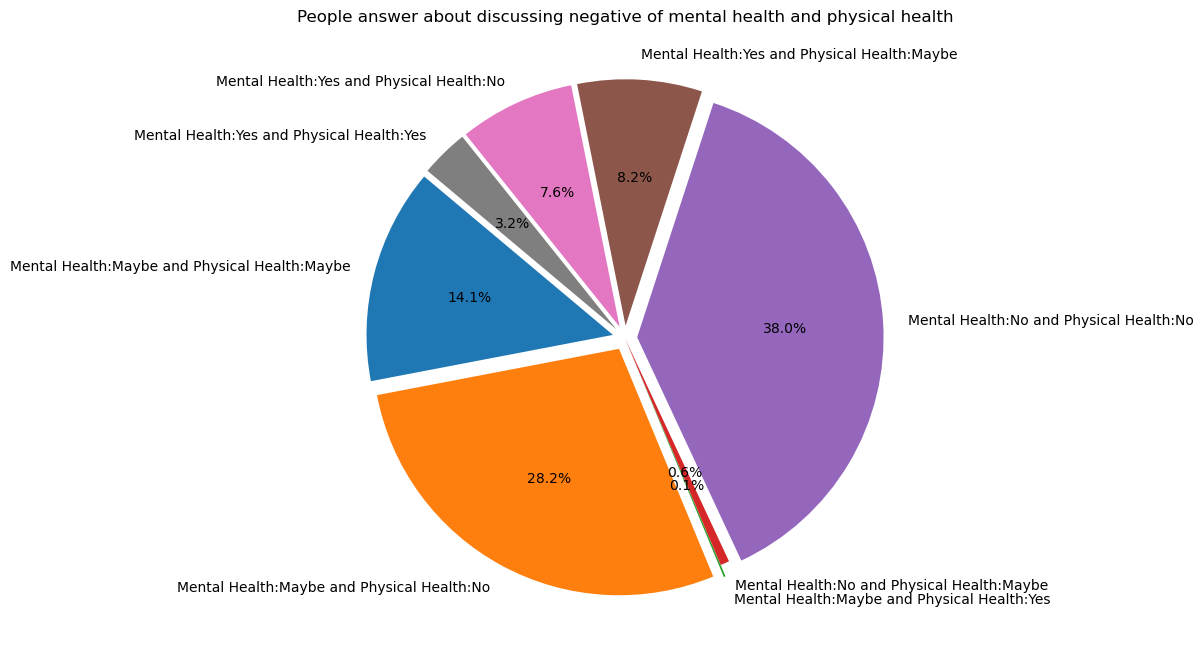

In [11]:
fig, ax = plt.subplots()

bar_width = 0.35
bar_positions1 = range(len(future_df['index']))
bar_positions2 = [pos + bar_width for pos in bar_positions1]
ax.bar(bar_positions1, future_df['future_ph_specification'], width=bar_width, label='Physical Health')
ax.bar(bar_positions2, future_df['future_mh_specification'], width=bar_width, label='Mental Health')
ax.set_xlabel('Available Answer')
ax.set_ylabel('Number of choice')
ax.set_title('Comparison of Physical Health and Mental Health in future specification')
ax.set_xticks([pos + bar_width / 2 for pos in bar_positions1])
ax.set_xticklabels(future_df['index'])
ax.legend()

labels = combined_count.apply(lambda x: f"Mental Health:{x['mh_discussion_neg_impact']} and Physical Health:{x['ph_discussion_neg_impact']}", axis=1)
sizes = combined_count['count']
plt.figure(figsize=(8, 8))
plt.pie(sizes,explode=(0.05, 0.05, 0.05, 0, 0.05, 0.05, 0.05, 0.05), labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('People answer about discussing negative of mental health and physical health')

plt.show()

##### **Conclusion**

+ Nhìn vào biểu đồ cột, ta có thể dễ dàng thấy mọi người có xu hướng `che giấu` các vấn đề về sức khỏe của mình hơn là so với việc có thể nêu rõ ra, đặc biệt là về vấn đề `sức khỏe tâm lý` khi ở giá trị `Yes`, sức khỏe tâm lý được chọn rất thấp, và `áp đảo` so với sức khỏe vật lý ở mục chọn `No`, tuy nhiên vẫn còn rất nhiều lựa chọn là `Maybe` thể hiện sự phân vân khi chọn phải nói ra hay không.
+ Dựa vào biểu đồ tròn, khi được hỏi có thảo luận về ảnh hưởng tiêu cực của các vấn đề sức khỏe không, thì số lượng `không quan tâm` về ảnh hưởng tiêu cực ở cả `sức khỏe tâm lý và sức khỏe vật lý` chiếm phần lớn trong khảo sát (37.5%). Thế nhưng ngược lại với việc chỉ ra vấn đề về sức khỏe ở trên, chiếm nhiều thứ 2 là `Có lẽ sẽ có bàn luận` về ảnh hưởng tiêu cực của `sức khỏe tâm lý` và `không thảo luận` về `sức khỏe vật lý` với 28.1%. Cũng như chiếm ít nhất là số lượng "`Có lẽ sẽ có bàn luận` về ảnh hưởng tiêu cực của `sức khỏe tâm lý` và `có thảo luận` về `sức khỏe vật lý`" với 0.1%. 
+ Khi đó ta sẽ thấy mọi người thường có xu hướng quan tâm đến hậu quả của sức khỏe tâm lý hơn so với vật lý, nhưng lại có xu hướng giấu đi các vấn đề về sức khỏe tâm lý hơn so với vấn đề về sức khỏe vật lý

#### Câu hỏi số 3: **Cảm nhận của mọi người về việc chia sẻ sức khỏe tinh thần trong cuộc sống hằng ngày**
+ Nguyên nhân: Biết được vấn đề này, ta có thể tìm ra căn nguyên dẫn tới việc mọi người ngại chia sẻ các vấn đề liên quan tới tâm lý, từ đó có thể tìm cách khác phục, giúp họ cởi mở hơn, thúc đẩy giảm thiểu những tác hại của sức khỏe tinh thần gây ra

##### **Preprocessing**

In [12]:
cowork_df = df[['mh_discussion_cowork']]
cowork_df = cowork_df['mh_discussion_cowork'].value_counts().reset_index()

supervisor_df = df[['mh_discussion_supervisor']]
supervisor_df = supervisor_df['mh_discussion_supervisor'].value_counts().reset_index()

sharing_df = pd.merge(cowork_df, supervisor_df, on='index', how='inner')
sharing_df

,index,mh_discussion_cowork,mh_discussion_supervisor
0,Maybe,362,301
1,No,298,243
2,Yes,205,321


In [13]:
reason_df = df[['mh_sharing_friends/fam_flag', 'mh_hurt_on_career', 'mh_neg_view_cowork', 'mh_bad_response_workplace']]
friendfam_df = reason_df['mh_sharing_friends/fam_flag'].value_counts().reset_index()
hurt_career_df = reason_df['mh_hurt_on_career'].value_counts().reset_index()
neg_view_df = reason_df['mh_neg_view_cowork'].value_counts().reset_index()
bad_responses_df = reason_df['mh_bad_response_workplace'].value_counts().reset_index()
bad_responses_df

,index,mh_bad_response_workplace
0,No,438
1,Maybe/Not sure,250
2,"Yes, I observed",174
3,"Yes, I experienced",117


##### **Visualization**

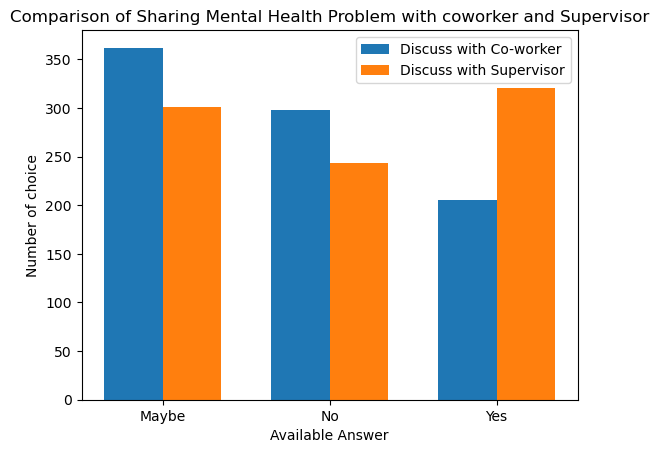

In [14]:
fig, ax = plt.subplots()
bar_width = 0.35
bar_positions1 = range(len(sharing_df['index']))
bar_positions2 = [pos + bar_width for pos in bar_positions1]
ax.bar(bar_positions1, sharing_df['mh_discussion_cowork'], width=bar_width, label='Discuss with Co-worker')
ax.bar(bar_positions2, sharing_df['mh_discussion_supervisor'], width=bar_width, label='Discuss with Supervisor')
ax.set_xlabel('Available Answer')
ax.set_ylabel('Number of choice')
ax.set_title('Comparison of Sharing Mental Health Problem with coworker and Supervisor')
ax.set_xticks([pos + bar_width / 2 for pos in bar_positions1])
ax.set_xticklabels(future_df['index'])
ax.legend()
plt.show()

Text(0.5, 1.0, 'MH Bad responses from workplace')

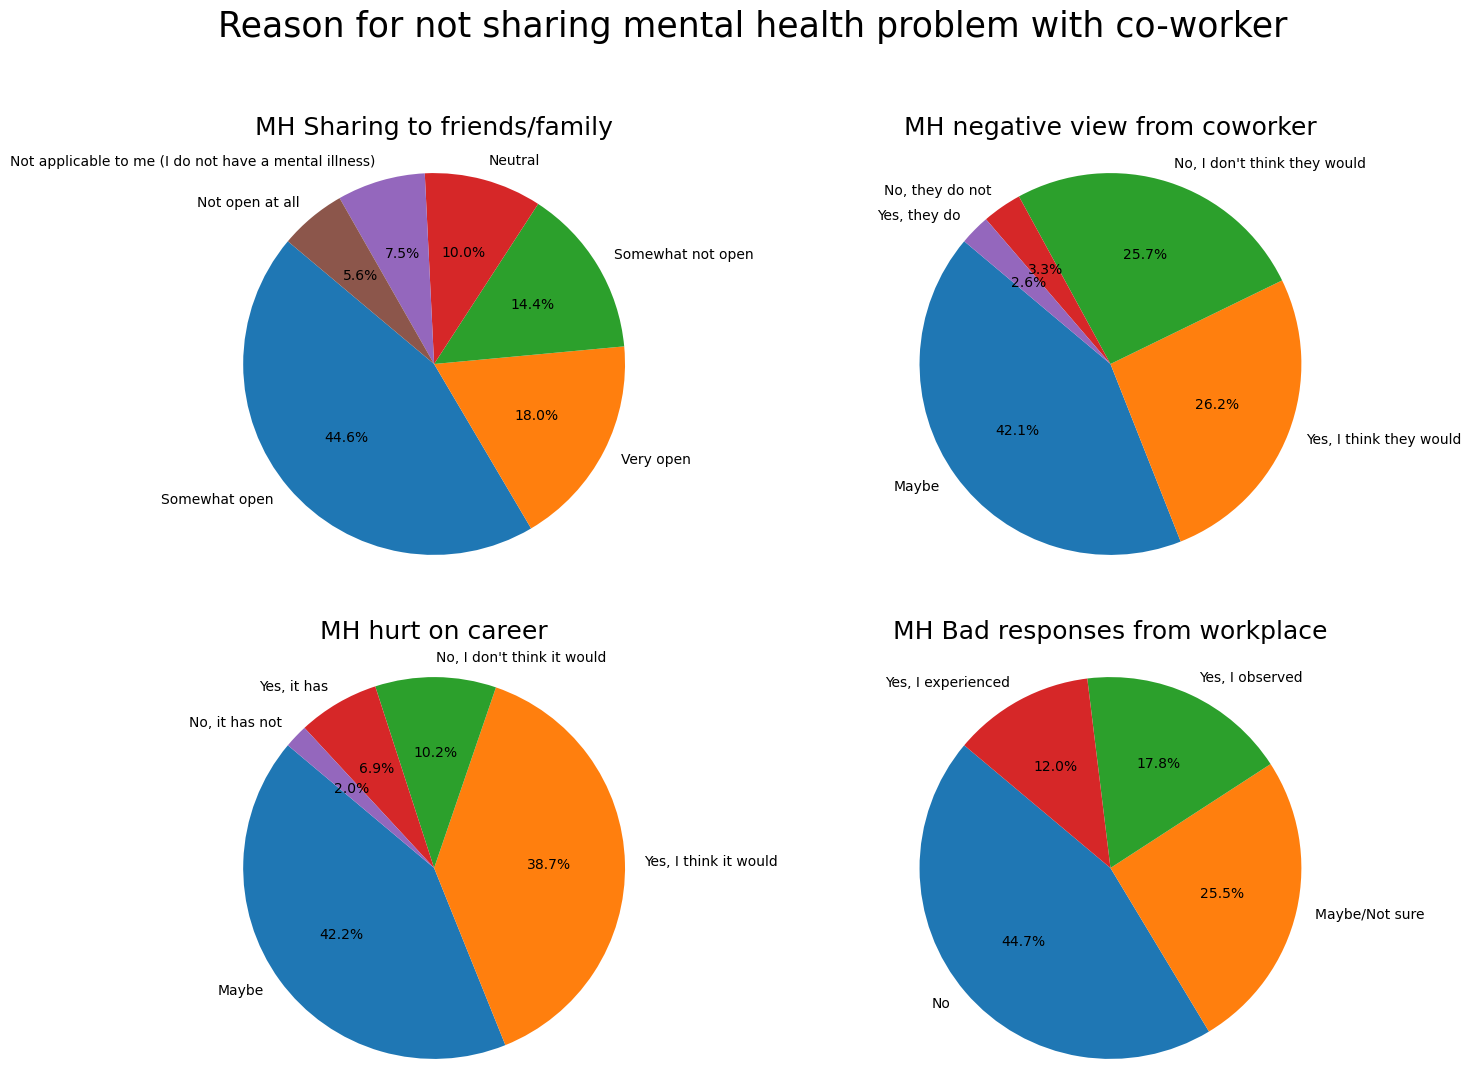

In [15]:
fig, axe = plt.subplots(figsize = (16, 12), ncols=2, nrows=2)
plt.suptitle('Reason for not sharing mental health problem with co-worker', fontsize = 25, y = 1)

axe[0][0].pie(friendfam_df['mh_sharing_friends/fam_flag'], labels=friendfam_df['index'], autopct='%1.1f%%', shadow=False, startangle=140)
axe[0][0].axis('equal')
axe[0][0].set_title('MH Sharing to friends/family', pad = 14, fontsize = 18)

axe[0][1].pie(neg_view_df['mh_neg_view_cowork'],labels = neg_view_df['index'], autopct='%1.1f%%', shadow=False, startangle=140)
axe[0][1].axis('equal')
axe[0][1].set_title('MH negative view from coworker', pad = 14, fontsize = 18)

axe[1][0].pie(hurt_career_df['mh_hurt_on_career'],labels = hurt_career_df['index'], autopct='%1.1f%%', shadow=False, startangle=140)
axe[1][0].axis('equal')
axe[1][0].set_title('MH hurt on career', pad = 14, fontsize = 18)

axe[1][1].pie(bad_responses_df['mh_bad_response_workplace'],labels = bad_responses_df['index'], autopct='%1.1f%%', shadow=False, startangle=140)
axe[1][1].axis('equal')
axe[1][1].set_title('MH Bad responses from workplace', pad = 14, fontsize = 18)

##### **Conclusion**

+ Dựa vào biểu đồ 1, chúng ta có thể thấy người ta có xu hướng `chia sẻ với cố vấn, người có chuyên môn` nhiều hơn là `chia sẻ với đồng nghiệp của mình`. Số lượng người `phân vân` có nên chia sẻ với đồng nghiệp và không chia sẻ với đồng nghiệp `cao hơn` so với việc `chia sẻ` với đồng nghiệp. Trong khi đó, việc `chia sẻ với cố vấn` hoàn toàn `cao hơn` so với `không chia sẻ` với cố vấn hoặc `phân vân` có nên chia sẻ với cố vấn hay không
+ Theo biểu đồ tròn đầu tiên, mọi người cũng có xu hướng `chia sẻ` vấn đề về sức khỏe tinh thần của mình `cho gia đình` ở nhiều mức độ khác nhau.
+ Dựa vào các biểu đồ tròn còn lại, ta có thể dễ dàng thấy `nguyên nhân` vì sao mọi người thường không thích chia sẻ các vấn đề sức khỏe cho đồng nghiệp mình hơn. Các lựa chọn cho rằng những lí do đưa trên `không ảnh hưởng đến công việc` của họ chưa bao giờ `chiếm quá nửa` số lượt chọn. Trong khi đó chiếm phần lớn là `sự phân vân` rằng việc đó có ảnh hưởng hay không, hay là những lựa chọn chắc chắn rằng việc đó có ảnh hưởng đến công việc. Ở đây ta gom chung những `người tán thành` và `phân vân` vào `chung một nhóm` để so sánh với các lựa chọn phủ nhận vì nếu họ phân vân có nghĩa là họ vẫn cho rằng `có thể nó sẽ có ảnh hưởng` ở một mức độ nào đó nhưng vì không quá chắc chắn với đáp án của mình.

#### Câu hỏi số 4: **Nhân viên làm việc trong lĩnh vực Công nghệ thông tin ở khu vực nào cảm thấy quan ngại chia sẻ sức khỏe tâm thần với mọi người trong cùng môi trường làm việc nhất?**

- Trả lời câu hỏi này giúp các công ty hiểu được tâm lý nhân việc về việc chia sẻ bệnh lý trong môi trường làm việc của họ. Từ đó có thể phát hiện sớm các lý do và đưa ra giải pháp để cải thiện chất lượng kịp thời, đảm bảo quyền lợi người lao động.
- Để trả lời câu hỏi này, chúng ta cần phải phân chia dữ liệu khảo sát người lao động lao động giữa các khu vực `country_work` thông qua các `mh_discussion_neg_impact`, `ph_discussion_neg_impact`, `mh_discussion_cowork`, `mh_discussion_supervisor`.

##### **Tiền xử lý dữ liệu**

- Chọn các đặc trưng cần thiết.

In [16]:
analyze1_df = df.copy()[['mh_discussion_neg_impact', 'ph_discussion_neg_impact', 'mh_discussion_cowork', 'mh_discussion_supervisor', 'country_work']]

- Phân chia các nơi làm việc của người lao động theo các châu lục.
    + Để làm việc này, đầu tiên chúng ta cần xem giá trị `unique` của đặc trưng `country_work`.

In [17]:
print(analyze1_df['country_work'].unique())

['United Kingdom' 'United States of America' 'Canada' 'Germany'
 'Netherlands' 'Czech Republic' 'Lithuania' 'France' 'Venezuela' 'Poland'
 'Brazil' 'Denmark' 'Belgium' 'Sweden' 'Russia' 'Spain'
 'United Arab Emirates' 'Mexico' 'Australia' 'Switzerland' 'India'
 'Ireland' 'Italy' 'Finland' 'Colombia' 'Costa Rica' 'Vietnam' 'Bulgaria'
 'South Africa' 'Slovakia' 'Austria' 'Bangladesh' 'Norway' 'Greece'
 'Other' 'New Zealand' 'Iran' 'Israel' 'Japan' 'Ecuador' 'Romania'
 'Bosnia and Herzegovina' 'Chile' 'Guatemala' 'Serbia' 'Estonia']


- Phân chia các nơi làm việc của người lao động theo các châu lục.
    + Tiếp theo, chúng ta sẽ điền các châu lục tương ứng của từng quốc gia.

In [18]:
areas = ['Europe', 'North America', 'North America', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'South America', 'Europe', 'South America', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Asia', 'North America', 'Oceania', 'Europe', 'Asia', 'Europe', 'Europe', 'Europe', 'South America', 'North America', 'Asia', 'Europe', 'Africa', 'Europe', 'Europe', 'Asia', 'Europe', 'Europe', 'Unknown', 'Oceania', 'Asia', 'Asia', 'Asia', 'South America', 'Europe', 'Europe', 'South America', 'North America', 'Europe', 'Europe']
countries = df['country_work'].unique()

# Create a dictionary with areas as keys and countries as values
replace_dict = pd.DataFrame({'country': countries, 'area': areas}).set_index('country').to_dict()

# Match the country with the area
analyze1_df['area'] = analyze1_df['country_work'].map(replace_dict['area'])

analyze1_df.sample(5)

,mh_discussion_neg_impact,ph_discussion_neg_impact,mh_discussion_cowork,mh_discussion_supervisor,country_work,area
802,Maybe,No,Maybe,No,Bosnia and Herzegovina,Europe
775,No,No,No,Maybe,United States of America,North America
766,NaN,NaN,NaN,NaN,Germany,Europe
705,Maybe,No,Maybe,Maybe,United States of America,North America
807,No,No,Maybe,Yes,Netherlands,Europe


- Xóa bỏ những dữ liệu không cần thiết.
    + Bởi vì trong đặc trưng `country_work` chứa tên các quốc gia không tồn tại và số lượng này khá ít nên chúng ta sẽ không khảo sát những dòng dữ liệu này.
    + Những dòng bị thiếu giá trị (missing value) là những khảo sát của chủ doanh nghiệp. Ở câu hỏi này, chúng tôi đang quan tâm đến sự e ngại của nhân viên/người lao động trong môi trường làm việc để có thể phát hiện sớm và hỗ trợ phúc lợi kịp thời. Vì vậy, những dòng dữ liệu thiếu này nếu điền giá trị dựa trên một cơ sở nào đó thì nó vẫn không đúng với mục đích câu hỏi. Chúng ta sẽ xóa những dòng dữ liệu này.

In [19]:
# Remove rows with 'Unknown' area
analyze1_df = analyze1_df[analyze1_df['area'] != 'Unknown']

In [20]:
# Statistics number of missing values in each column
print('\nNumber of missing values in each column:\n', analyze1_df.isnull().sum())

# Delete rows with missing values
analyze1_df = analyze1_df.dropna()

# Statistics number of missing values in each column after processing
print('\nNumber of missing values in each column after processing:\n', analyze1_df.isnull().sum())


Number of missing values in each column:
 mh_discussion_neg_impact    179
ph_discussion_neg_impact    179
mh_discussion_cowork        179
mh_discussion_supervisor    179
country_work                  0
area                          0
dtype: int64

Number of missing values in each column after processing:
 mh_discussion_neg_impact    0
ph_discussion_neg_impact    0
mh_discussion_cowork        0
mh_discussion_supervisor    0
country_work                0
area                        0
dtype: int64


- Loại bỏ cột `country_work` sau khi đã thay thế bằng châu lục.

In [21]:
# Drop `country_work` column and sort by `area`
analyze1_df = analyze1_df.drop('country_work', axis=1).sort_values('area')
analyze1_df.sample(5)

,mh_discussion_neg_impact,ph_discussion_neg_impact,mh_discussion_cowork,mh_discussion_supervisor,area
351,Maybe,No,No,No,North America
410,No,No,Maybe,Maybe,North America
817,Maybe,No,Maybe,Maybe,North America
768,Maybe,No,No,No,Europe
421,No,No,Maybe,Yes,North America


##### **Tính toán và xử lý số liệu**

- Xem các giá trị unique của từng cột được nhóm theo châu lục.

In [22]:
def value_counts_groupby(col, df: pd.DataFrame=analyze1_df):
    if col.name == 'area':
        return pd.Series([np.NaN]*len(df['area'].unique()), index=df['area'].unique())
    name_feature = col.name
    temp = df[[name_feature, 'area']]
    temp = temp.groupby(['area']).agg({name_feature: lambda x: x.value_counts().to_dict()})
    return pd.Series(temp[name_feature], index=temp.index)

analyze1_profile = analyze1_df.apply(lambda col: value_counts_groupby(col)).drop('area', axis=1)
analyze1_profile

,mh_discussion_neg_impact,ph_discussion_neg_impact,mh_discussion_cowork,mh_discussion_supervisor
Africa,"{'No': 2, 'Yes': 2}","{'No': 2, 'Maybe': 2}","{'No': 3, 'Yes': 1}","{'Yes': 2, 'No': 2}"
Asia,"{'Maybe': 6, 'No': 4, 'Yes': 3}","{'No': 7, 'Maybe': 6}","{'No': 7, 'Maybe': 3, 'Yes': 3}","{'Yes': 5, 'No': 5, 'Maybe': 3}"
Europe,"{'No': 99, 'Maybe': 93, 'Yes': 43}","{'No': 181, 'Maybe': 47, 'Yes': 7}","{'Maybe': 97, 'No': 74, 'Yes': 64}","{'Maybe': 85, 'Yes': 84, 'No': 66}"
North America,"{'Maybe': 257, 'No': 217, 'Yes': 107}","{'No': 423, 'Maybe': 137, 'Yes': 21}","{'Maybe': 250, 'No': 201, 'Yes': 130}","{'Yes': 215, 'Maybe': 204, 'No': 162}"
Oceania,"{'No': 8, 'Maybe': 7, 'Yes': 5}","{'No': 14, 'Maybe': 5, 'Yes': 1}","{'Maybe': 9, 'No': 6, 'Yes': 5}","{'Yes': 10, 'Maybe': 8, 'No': 2}"
South America,"{'Yes': 5, 'Maybe': 4, 'No': 3}","{'No': 9, 'Maybe': 2, 'Yes': 1}","{'No': 7, 'Maybe': 3, 'Yes': 2}","{'No': 6, 'Yes': 5, 'Maybe': 1}"


- Từ bảng trên, lưu trữ `dataframe` tổng số lượng câu trả lời mỗi `dict` và `dataframe` chứa `dict` câu trả lời `Yes` và `Maybe`.

In [23]:
# Store ratio 'Yes' and 'Maybe' answer in a new dataframe
analyze1_ratio = analyze1_profile.apply(lambda col: col.apply(lambda dict: 1-dict['No']/sum(dict.values())))*100
analyze1_ratio

,mh_discussion_neg_impact,ph_discussion_neg_impact,mh_discussion_cowork,mh_discussion_supervisor
Africa,50.000000,50.000000,25.000000,50.000000
Asia,69.230769,46.153846,46.153846,61.538462
Europe,57.872340,22.978723,68.510638,71.914894
North America,62.650602,27.194492,65.404475,72.117040
Oceania,60.000000,30.000000,70.000000,90.000000
South America,75.000000,25.000000,41.666667,50.000000


##### **Trực quan hóa**

**Tổng quan về thuộc tính trực quan**

- Số lượng câu trả lời của từng quan điểm trong cùng một khu vực có bằng nhau hay không.

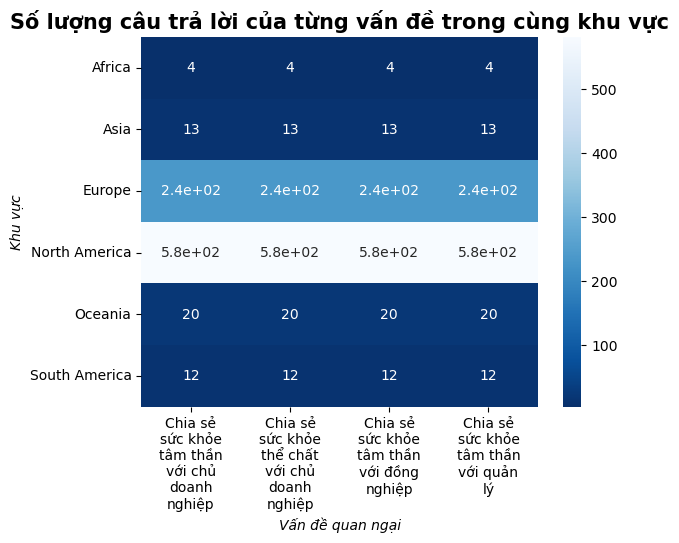

In [24]:
# Tính số lượng câu trả lời ở từng điểm dữ liệu
analyze1_sum = analyze1_profile.apply(lambda col: col.apply(lambda dict: sum(dict.values())))
analyze1_sum.columns = ['Chia sẻ sức khỏe tâm thần với chủ doanh nghiệp', 'Chia sẻ sức khỏe thể chất với chủ doanh nghiệp', 'Chia sẻ sức khỏe tâm thần với đồng nghiệp', 'Chia sẻ sức khỏe tâm thần với quản lý']

# Trực quan hóa dữ liệu
ax = sns.heatmap(analyze1_sum, cmap='Blues_r', annot=True);
plt.xlabel('Vấn đề quan ngại', fontdict={'style': 'italic'}); plt.ylabel('Khu vực', fontdict={'style': 'italic'})
wrap_labels(ax, 10)
plt.title('Số lượng câu trả lời của từng vấn đề trong cùng khu vực',
          fontdict={'size': 15, 'weight': 'bold'});

- Số lượng người tham gia khảo sát ở từng châu lục

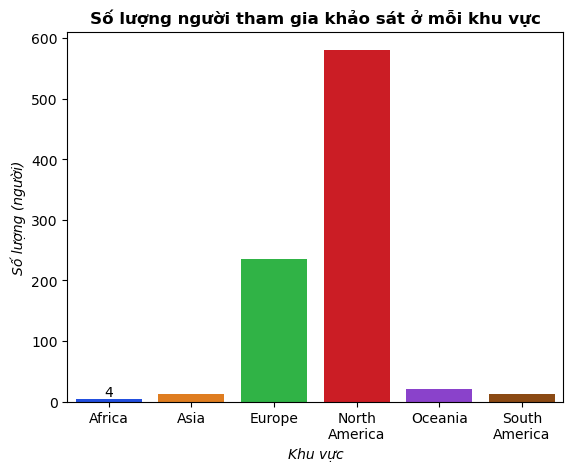

In [25]:
number_each_area = pd.Series(analyze1_sum['Chia sẻ sức khỏe thể chất với chủ doanh nghiệp'], index=analyze1_sum.index)

# Thống kê số lượng người tham gia khảo sát ở từng khu vực
ax = sns.barplot(x=number_each_area.index, y=number_each_area.values, palette='bright')
ax.bar_label(ax.containers[0])
ax.set_title('Số lượng người tham gia khảo sát ở mỗi khu vực', fontdict={'weight': 'bold', 'size': 12})
plt.xlabel('Khu vực', fontdict={'style': 'italic'}); plt.ylabel('Số lượng (người)', fontdict={'style': 'italic'})
wrap_labels(ax, 10)
plt.show()

- Sự tương quan về vấn đề quan ngại chia sẻ ở các khu vực trong mỗi giá trị (unique) của câu trả lời.

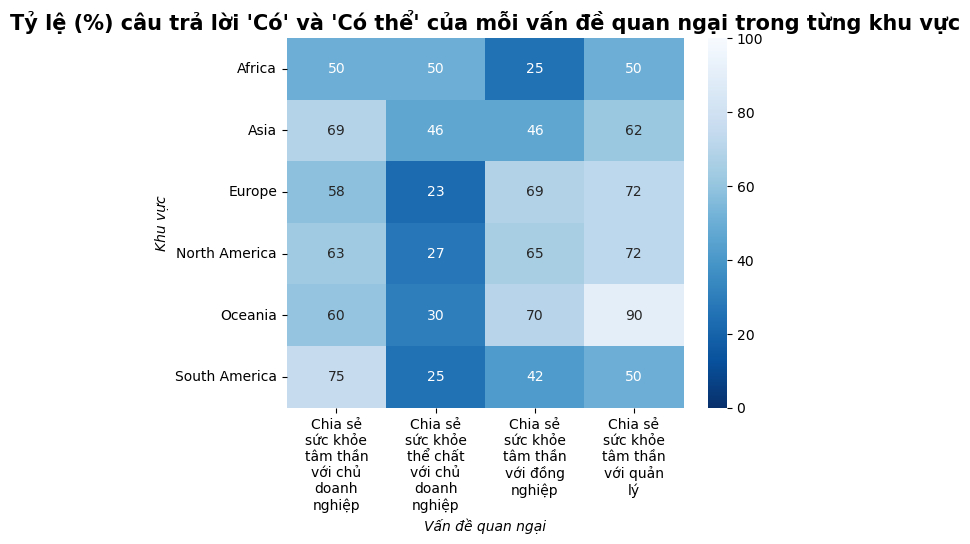

In [26]:
analyze1_ratio.columns = ['Chia sẻ sức khỏe tâm thần với chủ doanh nghiệp', 'Chia sẻ sức khỏe thể chất với chủ doanh nghiệp', 'Chia sẻ sức khỏe tâm thần với đồng nghiệp', 'Chia sẻ sức khỏe tâm thần với quản lý']

# Trực quan hóa dữ liệu
ax = sns.heatmap(analyze1_ratio, cmap='Blues_r', annot=True, vmin=0, vmax=100);
plt.xlabel('Vấn đề quan ngại', fontdict={'style': 'italic'}); plt.ylabel('Khu vực', fontdict={'style': 'italic'})
wrap_labels(ax, 10)
plt.title('Tỷ lệ (%) câu trả lời \'Có\' và \'Có thể\' của mỗi vấn đề quan ngại trong từng khu vực',
          fontdict={'size': 15, 'weight': 'bold'});

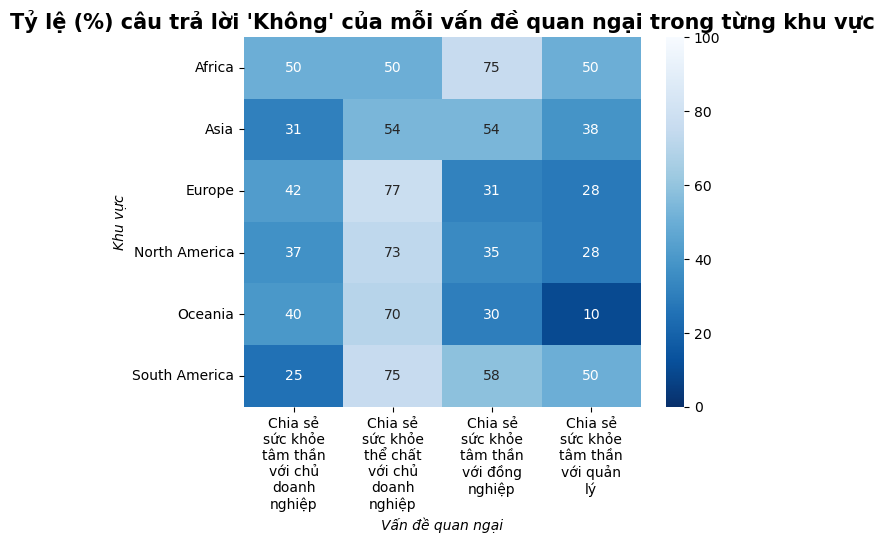

In [27]:
analyze1_no = analyze1_profile.apply(lambda col: col.apply(lambda dict: dict['No']/sum(dict.values())))*100
analyze1_no.columns = ['Chia sẻ sức khỏe tâm thần với chủ doanh nghiệp', 'Chia sẻ sức khỏe thể chất với chủ doanh nghiệp', 'Chia sẻ sức khỏe tâm thần với đồng nghiệp', 'Chia sẻ sức khỏe tâm thần với quản lý']

# Trực quan hóa dữ liệu
ax = sns.heatmap(analyze1_no, cmap='Blues_r', annot=True, vmin=0, vmax=100);
plt.xlabel('Vấn đề quan ngại', fontdict={'style': 'italic'}); plt.ylabel('Khu vực', fontdict={'style': 'italic'})
wrap_labels(ax, 10)
plt.title('Tỷ lệ (%) câu trả lời \'Không\' của mỗi vấn đề quan ngại trong từng khu vực',
          fontdict={'size': 15, 'weight': 'bold'});

**Kết quả trực quan**

- Trực quan sự quan ngại của người tham gia khảo sát.

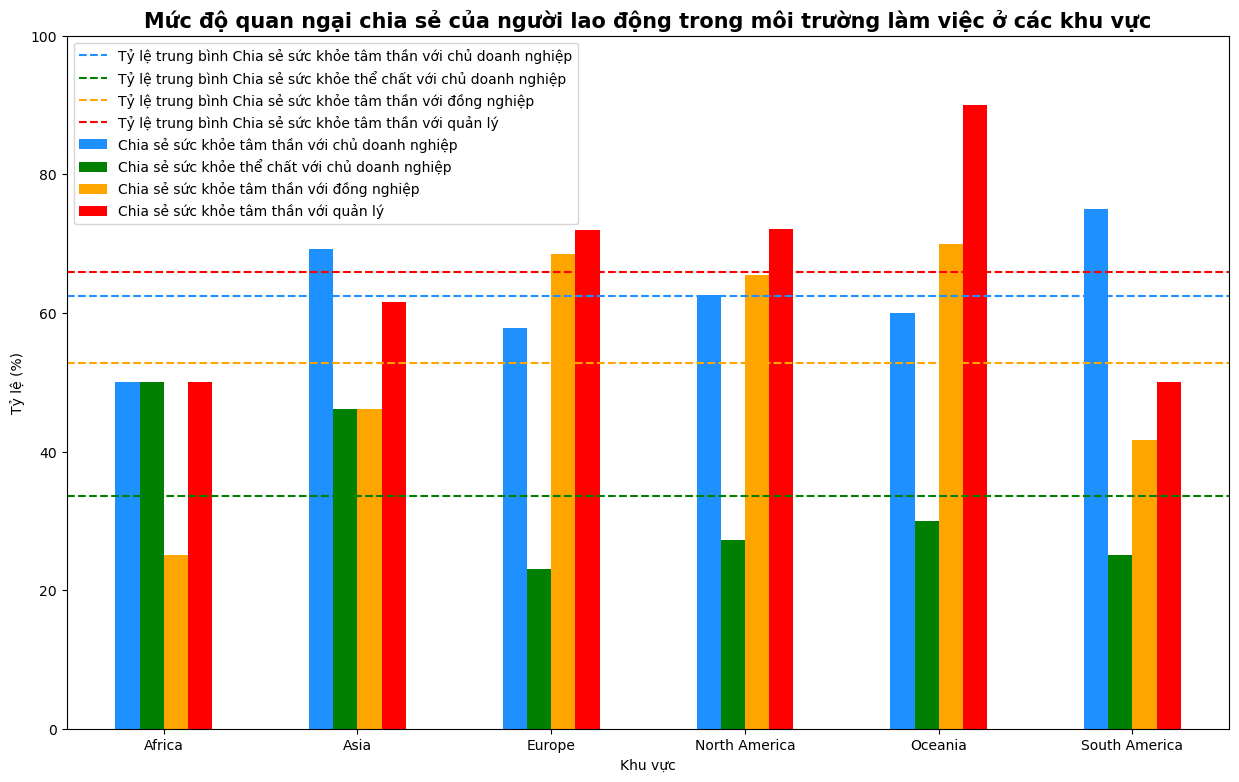

In [28]:
analyze1_plot = analyze1_ratio.reset_index(names='area')
analyze1_plot.columns = ['Khu vực', 'Chia sẻ sức khỏe tâm thần với chủ doanh nghiệp', 'Chia sẻ sức khỏe thể chất với chủ doanh nghiệp', 'Chia sẻ sức khỏe tâm thần với đồng nghiệp', 'Chia sẻ sức khỏe tâm thần với quản lý']

color_ = ['dodgerblue', 'green', 'orange', 'red']
color_dict = pd.Series(color_, index=analyze1_plot.columns[1:]).to_dict()

analyze1_plot.plot(x='Khu vực',
                y=['Chia sẻ sức khỏe tâm thần với chủ doanh nghiệp', 'Chia sẻ sức khỏe thể chất với chủ doanh nghiệp', 'Chia sẻ sức khỏe tâm thần với đồng nghiệp', 'Chia sẻ sức khỏe tâm thần với quản lý'],
                kind='bar', figsize=(15, 9), color=color_,
                ylabel='Tỷ lệ (%)', ylim=(0, 100),
                xlabel='Khu vực');

# Đường ngang là giá trị trung bình của mỗi feature
for feature in analyze1_plot.columns[1:]:
    mean = analyze1_plot[feature].mean()
    plt.axhline(mean, linestyle='--', color=color_dict[feature], label=f'Tỷ lệ trung bình {feature}')
plt.legend();
plt.xticks(rotation = 0);
plt.title('Mức độ quan ngại chia sẻ của người lao động trong môi trường làm việc ở các khu vực', fontdict={'size': 15, 'weight': 'bold'});

##### **Đánh giá chung:**

- **Tỷ lệ người lao động ngại chia sẻ thông tin về sức khỏe tâm thần và sức khỏe thể chất đều khá cao ở tất cả các châu lục, với mức trung bình trên $50\%$.** Điều này cho thấy rằng việc chia sẻ thông tin về sức khỏe tâm thần và sức khỏe thể chất tại nơi làm việc vẫn còn là một vấn đề đáng lo ngại.
- **Có sự khác biệt đáng kể về tỷ lệ người lao động ngại chia sẻ thông tin về sức khỏe tâm thần và sức khỏe thể chất giữa các châu lục.** Cụ thể, châu Phi có tỷ lệ người lao động ngại chia sẻ thông tin về sức khỏe tâm thần thấp nhất ($20\%$ - $50\%$), trong khi châu Úc có tỷ lệ người lao động ngại chia sẻ thông tin về sức khỏe tâm thần cao nhất ($30\%$ - $90\%$).
- **Tỷ lệ người lao động ngại chia sẻ thông tin về sức khỏe tâm thần cao hơn tỷ lệ người lao động ngại chia sẻ thông tin về sức khỏe thể chất ở tất cả các châu lục.** Điều này cho thấy rằng sức khỏe tâm thần vẫn còn là một vấn đề nhạy cảm hơn sức khỏe thể chất tại nơi làm việc.
- **Tỷ lệ người lao động ngại chia sẻ thông tin về sức khỏe tâm thần với chủ doanh nghiệp hay người quản lý cao hơn nhiều so với đồng nghiệp.** Điều này cho thấy còn tồn tại nhiều lý do khiến người lao động bị rào cản chia sẻ vấn đề sức khỏe của họ. Nó đang làm cho người lao động không được hưởng quyền lợi chính đáng của họ.
- **Số lượng câu trả lời ở mỗi khu vực có sự chênh lệch rõ rệt**. Điều này cho thấy một số vấn đề:
    + Ở các khu vực có số lượng ít câu trả lời, người lao động chưa thực sự quan tâm đến sức khỏe tâm thần.
    + Người lao động ở các khu có số lượng ít câu trả lời đang quan ngại chia sẻ ý kiến bản thân về sức khỏe tâm thần trong môi trường làm việc.
    + Khảo sát này chưa thực sự được phổ biến nhiều với người lao động ở các khu có số lượng ít câu trả lời.
    + Nó dẫn đến sự đánh không phù hợp đối với các khu vực có số lượng câu trả lời quá ít.

$\Rightarrow$ Các công ty/doanh nghiệp và quản lý cấp cao chưa thật sự quan tâm về vấn đề sức khỏe tinh thần, vô hình chung tạo rào cản khi nhân viên trong công ty muốn chia sẻ với họ. Bên cạnh đó, môi trường làm việc không thân thiện cũng khiến đồng nghiệp trong cùng công ty ít chia sẻ thông tin về sức khỏe tâm thần với nhau. Vì vậy, đây có thể là một trong các lý do những nhân viên quan ngại không được tiếp xúc với nhiều nguồn thông tin cũng như sự hỗ trợ về sức khỏe tâm thần như một lợi ích chính đáng của họ.

#### Câu hỏi số 5: **Tỷ lệ người tham gia khảo sát mà họ nghĩ rằng có thể hoặc đang gặp vấn đề về sức khỏe tâm thần hiện nay như thế nào?**

- Trả lời câu hỏi này sẽ có cái nhìn tổng quan về lao động làm việc trên toàn cầu, phát hiện và tìm hiểu sớm lý do để đưa ra giải pháp đảm bảo quyền lợi người lao động.
- Để trả lời câu hỏi này, chúng ta dựa trên `mh_disorder_current` và khảo sát thông qua các `age`, `sex`, `country_work` và `remote_flag`.

##### **Xử lý dữ liệu**

- Chọn các đặc trưng cần thiết.

In [29]:
analyze2_df = df.copy()[['mh_disorder_current', 'age', 'sex', 'country_work', 'remote_flag']]
analyze2_df.sample(5)

,mh_disorder_current,age,sex,country_work,remote_flag
374,Yes,33,Male,United States of America,Sometimes
511,Maybe,31,Male,United States of America,Always
994,Yes,22,Male,United States of America,Sometimes
731,No,25,Male,United States of America,Sometimes
437,Maybe,35,Male,United Kingdom,Never


- Xử lý giá trị bị thiếu trong dữ liệu.

In [30]:
# Statistics number of missing values in each column
print('Number of missing values in each column:\n', analyze2_df.isnull().sum())

# Fill np.NaN by mode each column
analyze2_df = analyze2_df.fillna(analyze2_df.mode().iloc[0])

# Statistics number of missing values in each column
print('\nNumber of missing values in each column after dropping rows:\n', analyze2_df.isnull().sum())

Number of missing values in each column:
 mh_disorder_current    0
age                    0
sex                    2
country_work           0
remote_flag            0
dtype: int64

Number of missing values in each column after dropping rows:
 mh_disorder_current    0
age                    0
sex                    0
country_work           0
remote_flag            0
dtype: int64


- Phân chia các nơi làm việc của người lao động theo các châu lục.

In [31]:
areas = ['Europe', 'America', 'America', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'America', 'Europe', 'America', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Asia', 'America', 'Oceania', 'Europe', 'Asia', 'Europe', 'Europe', 'Europe', 'America', 'America', 'Asia', 'Europe', 'Africa', 'Europe', 'Europe', 'Asia', 'Europe', 'Europe', 'Unknown', 'Oceania', 'Asia', 'Asia', 'Asia', 'America', 'Europe', 'Europe', 'America', 'America', 'Europe', 'Europe']
countries = df['country_work'].unique()

# Create a dictionary with areas as keys and countries as values
replace_dict = pd.DataFrame({'country': countries, 'area': areas}).set_index('country').to_dict()

# Match the country with the area
analyze2_df['country_work'] = analyze2_df['country_work'].map(replace_dict['area'])

# Drop the rows that are 'Unknown' in the 'country_work' column
analyze2_df = analyze2_df[analyze2_df['country_work'] != 'Unknown']

analyze2_df.head(10)

,mh_disorder_current,age,sex,country_work,remote_flag
0,No,39,Male,Europe,Sometimes
1,Yes,29,Male,America,Never
2,No,38,Male,Europe,Always
3,Yes,43,Female,America,Sometimes
4,Yes,42,Male,Europe,Sometimes
5,No,30,Male,America,Sometimes
6,Yes,37,Female,America,Always
7,Yes,44,Female,America,Sometimes
8,Yes,30,Male,America,Always
9,Yes,28,Male,America,Never


- Chia độ tuổi người tham gia khảo sát thành 3 khoảng độ tuổi $\leq30$, $(30;60]$ và $>60$.

In [32]:
# Divied age column into three age groups (<30, 30-60, >60)
analyze2_df['age'] = pd.cut(analyze2_df['age'], bins=[0, 30, 60, 100], labels=['≤ 30', '31 - 60', '> 60'])

analyze2_df.head(10)

,mh_disorder_current,age,sex,country_work,remote_flag
0,No,31 - 60,Male,Europe,Sometimes
1,Yes,≤ 30,Male,America,Never
2,No,31 - 60,Male,Europe,Always
3,Yes,31 - 60,Female,America,Sometimes
4,Yes,31 - 60,Male,Europe,Sometimes
5,No,≤ 30,Male,America,Sometimes
6,Yes,31 - 60,Female,America,Always
7,Yes,31 - 60,Female,America,Sometimes
8,Yes,≤ 30,Male,America,Always
9,Yes,≤ 30,Male,America,Never


- Lưu trữ thông tin thống kê của các đặc trưng thành những `pd.Dataframe` riêng biệt

In [33]:
area_df = analyze2_df[['mh_disorder_current', 'country_work']].groupby('country_work').value_counts().unstack().fillna(0)
area_df.columns.name = None
age_df = analyze2_df[['mh_disorder_current', 'age']].groupby('age').value_counts().unstack().fillna(0)
age_df.columns.name = None
gender_df = analyze2_df[['mh_disorder_current', 'sex']].groupby('sex').value_counts().unstack().fillna(0)
gender_df.columns.name = None
remoteness_df = analyze2_df[['mh_disorder_current', 'remote_flag']].groupby('remote_flag').value_counts().unstack().fillna(0)
remoteness_df.columns.name = None

##### **Trực quan hóa dữ liệu**

**Tổng quan về thuộc tính trực quan**

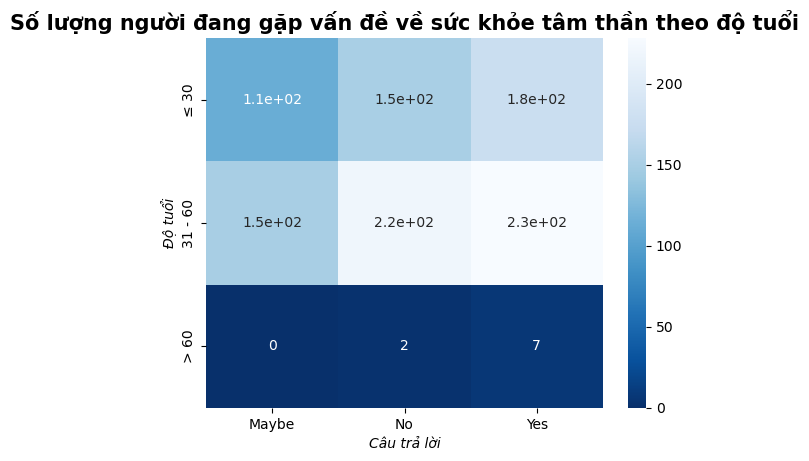

In [34]:
# Trực quan hóa dữ liệu
sns.heatmap(age_df, cmap='Blues_r', annot=True);
plt.xlabel('Câu trả lời', fontdict={'style': 'italic'}); plt.ylabel('Độ tuổi', fontdict={'style': 'italic'})
plt.title('Số lượng người đang gặp vấn đề về sức khỏe tâm thần theo độ tuổi',
          fontdict={'size': 15, 'weight': 'bold'});

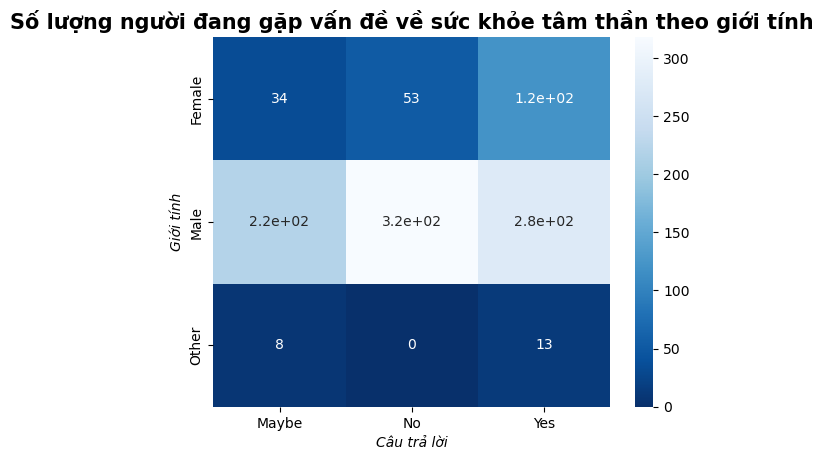

In [35]:
# Trực quan hóa dữ liệu
sns.heatmap(gender_df, cmap='Blues_r', annot=True);
plt.xlabel('Câu trả lời', fontdict={'style': 'italic'}); plt.ylabel('Giới tính', fontdict={'style': 'italic'})
plt.title('Số lượng người đang gặp vấn đề về sức khỏe tâm thần theo giới tính',
          fontdict={'size': 15, 'weight': 'bold'});

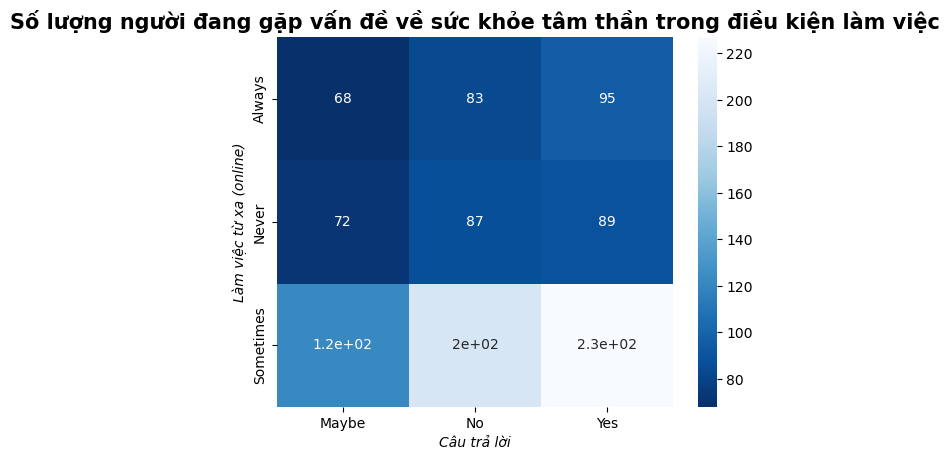

In [36]:
# Trực quan hóa dữ liệu
sns.heatmap(remoteness_df, cmap='Blues_r', annot=True);
plt.xlabel('Câu trả lời', fontdict={'style': 'italic'}); plt.ylabel('Làm việc từ xa (online)', fontdict={'style': 'italic'})
plt.title('Số lượng người đang gặp vấn đề về sức khỏe tâm thần trong điều kiện làm việc',
          fontdict={'size': 15, 'weight': 'bold'});

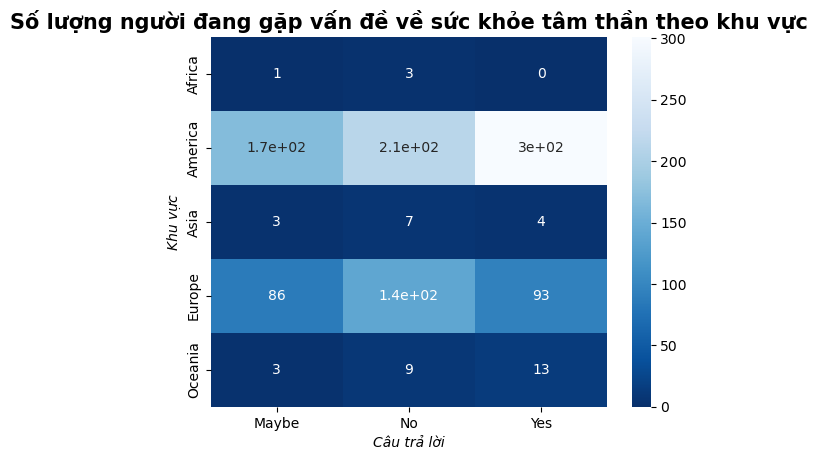

In [37]:
# Trực quan hóa dữ liệu
sns.heatmap(area_df, cmap='Blues_r', annot=True);
plt.xlabel('Câu trả lời', fontdict={'style': 'italic'}); plt.ylabel('Khu vực', fontdict={'style': 'italic'})
plt.title('Số lượng người đang gặp vấn đề về sức khỏe tâm thần theo khu vực',
          fontdict={'size': 15, 'weight': 'bold'});

**Kết quả trực quan**

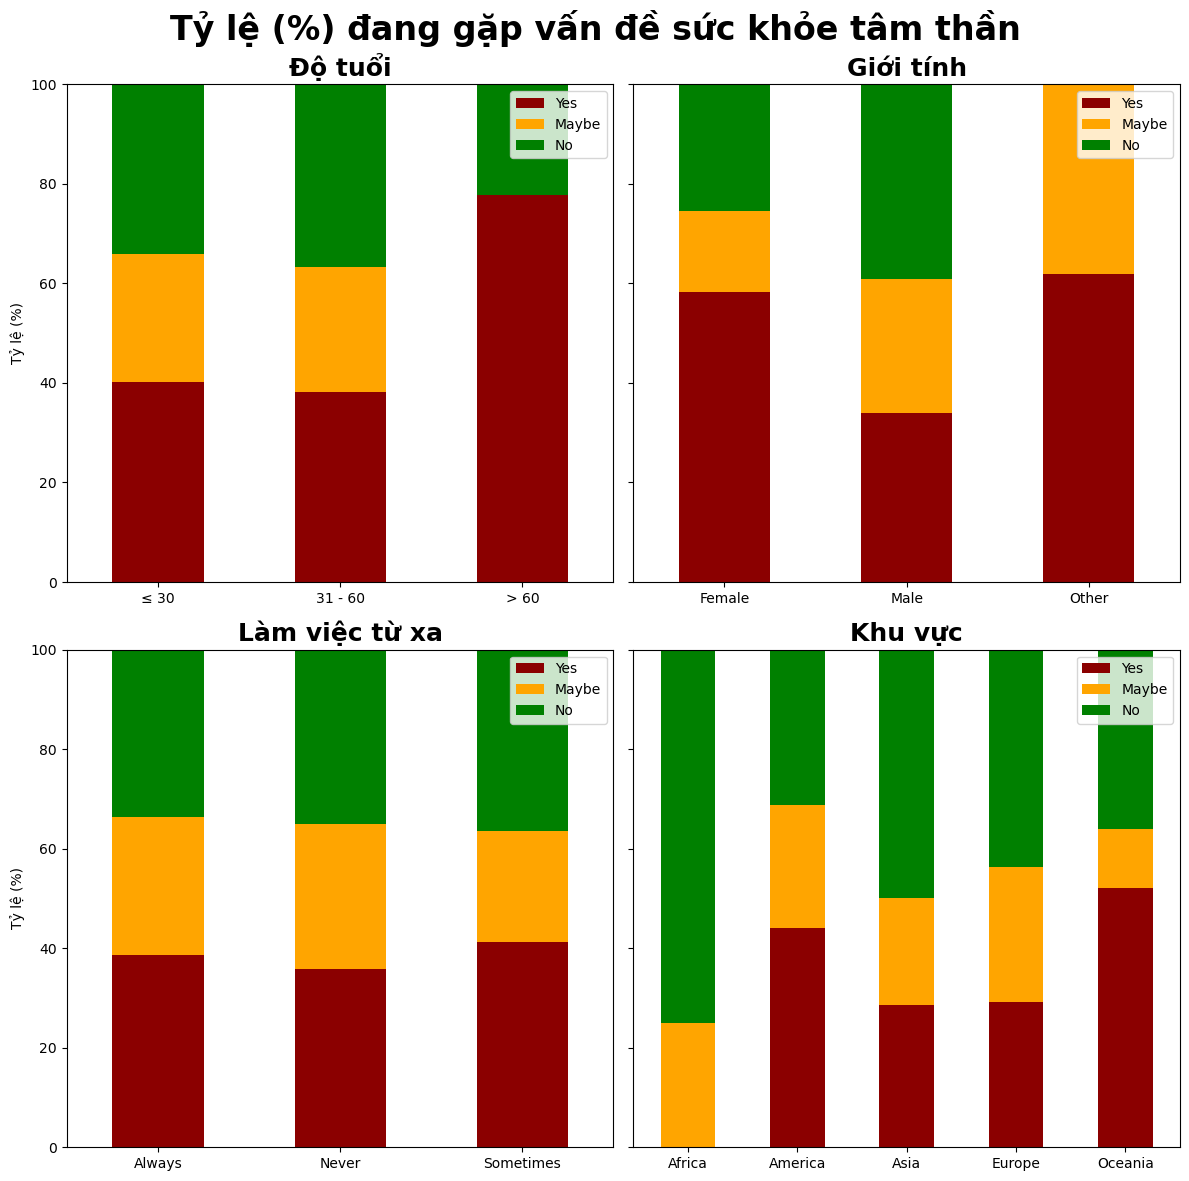

In [38]:
# Convert to percentage
age_perc = (age_df.div(age_df.sum(axis=1), axis=0) * 100).reset_index()
gender_perc = (gender_df.div(gender_df.sum(axis=1), axis=0) * 100).reset_index()
remoteness_perc = (remoteness_df.div(remoteness_df.sum(axis=1), axis=0) * 100).reset_index()
area_perc = (area_df.div(area_df.sum(axis=1), axis=0) * 100).reset_index()

color_ = ['darkred', 'orange', 'green']

# Plot 4 pie charts of age, gender, remote, area in a 2x2 grid
fig, ax = plt.subplots(2, 2, figsize=(12, 12), sharey=True)
fig.suptitle('Tỷ lệ (%) đang gặp vấn đề sức khỏe tâm thần', fontsize=24, fontweight='bold')

# Plot age_perc
age_perc.plot(x='age', y=['Yes', 'Maybe', 'No'], kind='bar', ax=ax[0, 0], stacked=True, rot=0, ylim=(0, 100), ylabel='Tỷ lệ (%)', xlabel='', color=color_);
ax[0, 0].set_title('Độ tuổi', fontdict={'weight': 'bold', 'size': 18});

# Plot gender_perc
gender_perc.plot(x='sex', y=['Yes', 'Maybe', 'No'], kind='bar', ax=ax[0, 1], stacked=True, rot=0, ylim=(0, 100), ylabel='Tỷ lệ (%)', xlabel='', color=color_);
ax[0, 1].set_title('Giới tính', fontdict={'weight': 'bold', 'size': 18});

# Plot remoteness_perc
remoteness_perc.plot(x='remote_flag', y=['Yes', 'Maybe', 'No'], kind='bar', ax=ax[1, 0], stacked=True, rot=0, ylim=(0, 100), ylabel='Tỷ lệ (%)', xlabel='', color=color_);
ax[1, 0].set_title('Làm việc từ xa', fontdict={'weight': 'bold', 'size': 18});

# Plot area_perc
area_perc.plot(x='country_work', y=['Yes', 'Maybe', 'No'], kind='bar', ax=ax[1, 1], stacked=True, rot=0, ylim=(0, 100), ylabel='Tỷ lệ (%)', xlabel='', color=color_);
ax[1, 1].set_title('Khu vực', fontdict={'weight': 'bold', 'size': 18});

fig.tight_layout()

##### **Đánh giá chung:**

- **Tỷ lệ người lao động cảm thấy hay đang có vấn đề tâm thần phân loại theo mọi khía cạnh đều mức trung bình khá cao, trên $50\%$.** Điều này cho thấy rằng người lao động có thể đang gặp nhiều tác nhân tiêu cực khiến họ cảm thấy hoặc đang gặp vấn đề về sức khỏe tâm thần.
    - _Theo độ tuổi:_ **Những người trên 60 tuổi đang có vấn đề về sức khỏe tâm thần khá cao**, cụ thể tỷ lệ này chiếm gần $80\%$ trong những người trên 60 tuổi tham gia khảo sát. Điều này cho thấy những người lao động lớn tuổi dễ bị ảnh hưởng tiêu cực khiến họ tổn thương về sức khỏe tâm thần.
    - _Theo giới tính:_ **Tỷ lệ những người thuộc cộng đồng LGBT cảm thấy bản thân đang gặp vấn đề sức khỏe tâm thần rất cao.** Cụ thể, khoảng $80\%$ người tham gia khảo sát họ cho rằng mình đang bị tổn thương về sức khỏe tâm thần, và $20\%$ còn lại cũng cho biết họ cảm thấy bản thân cũng đang có khả năng cao gặp vấn đề này. Đây là con số đáng báo động, cho thấy có nhiều lý do khiến những người thuộc LGBT gặp vấn đề sức khỏe tâm thần.
    - _Theo điều kiện làm việc:_ **Dù người tham gia khảo sát đang làm việc từ xa hay trực tiếp tại công ty đều gặp phải vấn đề về sức khỏe tâm thần trên $60\%$.** Có thể thấy rằng với mỗi hình thức làm việc luôn có một số nguyên nhân khiến bản thân họ cảm thấy tiêu cực và tổn thương sức khỏe tâm thần.
    - _Theo khu vực:_ **Khu vực châu Mỹ là nơi có nhiều người cảm thấy và đang gặp vấn đề về sức khỏe tâm thần.** Điều đó cho thấy rằng châu Mỹ có môi trường làm việc khắc nghiệt hơn so với các châu lục còn lại, đễ khiến con người bị tổn thương sức khỏe tâm thần.

$\Rightarrow$ Bất kỳ ai, dù ở độ tuổi, giới tính, điều kiện làm việc và khu vực nào hiện nay trên thế giới đều cảm thấy hoặc đang gặp vấn đề về sức khỏe tâm thần, chiếm tỷ lệ ở mức cao. Nó cho thấy những nguồn hỗ trợ sức khỏe tâm thần chưa được quan tâm sâu sắc và mọi người gặp nhiều khó khăn khi tiếp cận. Vì vậy cần phải cải thiện và hỗ trợ kịp thời để nâng cao chất lượng sức khỏe làm việc của người lao động trên toàn cầu.